In [ ]:

import os
from skimage import io
from natsort import natsorted,ns
from skimage.transform import resize
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from skimage.util import crop

import tensorflow as tf
import tensorflow.keras

import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten,Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#from tensorflow.keras.applications.mobilenet_v2.preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
#from glob import glob
import matplotlib.pyplot as plt

AxesImage(54,36;334.8x217.44)


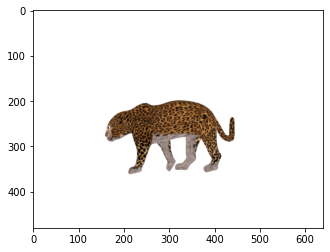

In [ ]:
path ="Synthetic_Leopard_Circle"
list_files = os.listdir(path)

list_files = natsorted(list_files)

image_list= []
for filename in list_files:
    image_list.append(io.imread(os.path.join(path,filename)))
print(plt.imshow(image_list[0]))

### Cropping Images
<font color= blue> Cropping the white part of the images from each side of the image. We have to be careful that we dont crop too much that the object in the image dont get cut when rotating as it will reduce the accuracy of the model.</font>

In [ ]:

crop_image=[]
for i in image_list:
   B = crop(i, ((160, 110), (120, 130), (0,0)), copy=False)
   crop_image.append(B)
   #B = crop(i, ((180, 110), (150, 140), (0,0)), copy=False)

BEFORE CROPPING
(480, 640, 3)
AFTER CROPPING
(210, 390, 3)
120
120
(480, 640, 3) (210, 390, 3)


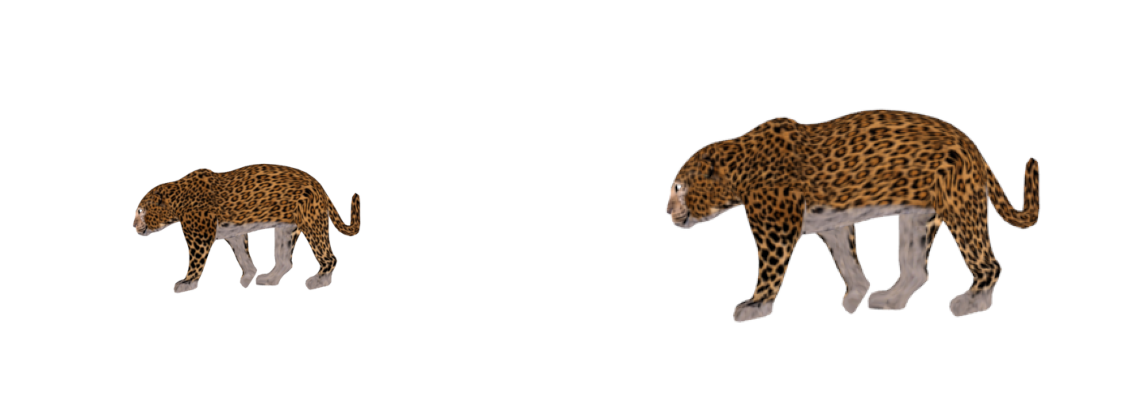

AxesImage(54,36;334.8x217.44)


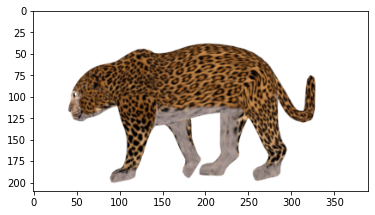

In [ ]:
print("BEFORE CROPPING")
print(image_list[0].shape)
print("AFTER CROPPING")
print(crop_image[0].shape)
print(len(image_list))
print(len(crop_image))
A = image_list[0]
B = crop_image[0]
print(A.shape, B.shape)
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(A), plt.axis('off')
plt.subplot(122), plt.imshow(B), plt.axis('off')
plt.show()
print(plt.imshow(crop_image[1]))

In [ ]:
#print(crop_image[0])

### Reshaping to (100,100,6)

120
(100, 100, 3)
AxesImage(54,36;334.8x217.44)


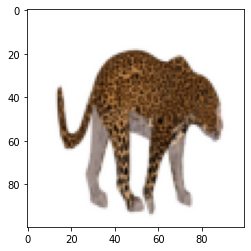

In [ ]:
resized_image_list=[]
for image in crop_image:
    image = resize(image, (100,100,3))
    resized_image_list.append(image)
print(len(resized_image_list))
print(resized_image_list[1].shape)
print(plt.imshow(resized_image_list[57]))

### CONVERTING LIST INTO NP ARRAY

In [ ]:
image_file=np.array(resized_image_list)

In [ ]:
print(image_file[0].max())

1.0


### Important Note :
<font color= red> Please note that , I have considered the degree difference -45 to 45 as -15 to 15 . It will have no effect on the accuracy as this degree difference was only used to label for my classification and is not involved in  mathematical calculation of images. In short,a degree difference of 3 will correspond to degree difference 1. So instead of having degree from 0 to 357 degree we will have degree from 0 to 119.

I have put all the analysis of the curve at the top of each problem's solution so that TA dont have to search for it at the bottom of each solution.</font>


### Creating Angle Array
I made an array that will correspond the different angles of the image from 0 to 119 degree.</font>

In [ ]:
image_name=[]
for i in range(0,len(list_files)):
    image_name.append(i)
print(image_name)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [ ]:
#converting to an np array
image_name=np.array(image_name)

In [ ]:
image_name.shape

(120,)

### Creating shuffle index
<font color= blue>Before we pre-process our data we have to divide our dataset in train,test and validation set. So we have to shuffle all our images to avoid data imbalance. So I have created a shuffle index so that I can shuffle both my image list and the label/angle difference list. </font>


In [ ]:
x=np.random.permutation(len(image_file))

In [ ]:
print(x)

[  2  64  92  95  89  15  79 102 104  45  76  28  96  42  69  18  10  19
  51  77 100  52  35  36  49  47  80  67  21  41  22 110  14  17 113   8
  32  37  59  91 108  34  55 118  78 107  73  61  72  86   4   5  46   1
 106  27  57  84  58   7  90 119 111   3  23  44  99  75  93  20 105 101
 116  43  63 109  40  85  11  50  33  83  97  65  26  82  13 114 115  25
  48  53  87  94   9   0  30 112  98  12 103  81  56  68  24  38  74  29
  60  39   6  54  16  71  70  31 117  62  88  66]


### Shuffling all image array and image file name list

In [ ]:
shuffled_image=image_file[x]
shuffled_imageName=image_name[x]

In [ ]:
#print(image_file[0])

In [ ]:
#print(plt.imshow(shuffled_image[57]))

In [ ]:
#print(shuffled_imageName[0])

In [ ]:
#for ele in enumerate(shuffled_imageName):
     #print(ele)

In [ ]:
#x1=np.concatenate((image_file[0],image_file[1]),axis=2)
#print(x1.shape)

### Diving datat into training, validation and test

In [ ]:
#image file:
Training_set=shuffled_image[0:90]
Validation_Set=shuffled_image[90:100]
Test_Set=shuffled_image[100:120]

#classes:
Training_class=shuffled_imageName[0:90]
Validation_class=shuffled_imageName[90:100]
Test_class=shuffled_imageName[100:120]

In [ ]:
print(Training_set.shape)
print(Validation_Set.shape)
print(Test_Set.shape)

print(Training_class.shape)
print(Validation_class.shape)
print(Test_class.shape)

(90, 100, 100, 3)
(10, 100, 100, 3)
(20, 100, 100, 3)
(90,)
(10,)
(20,)


## Explanation of Parining of images :
<font color= blue>  I have paired each image  with images that are between +-45 degrees. So an image paired with the top 15 images has a 3 degree difference until it reaches the last degree that is 45. And it paired with 15 down images until the last image with angle difference of -45 degree. Note that it also paired with itself. So we have 31 pairs of each image. So the data set has 120 images. So we will get 31*120 image pairs. We have to deal with images that have an angle greater than the maximum degree but it pairs images because it's in the range. So we have take the modulus value to find the real difference after we add/subtract image angle's with the image angle that we are pairing with.</font>


<font color= blue>I have also created an array of the degree differences of each image's 31 pairs . So we will have 31*120 pairs of angle difference of pairs of each images.So it will be our labels</font>



### Paring Training set

In [ ]:
Train_degree=[]
Train_pair_image=[]
for img in Training_class:
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            Train_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Train_degree.append(i)

Train_pair_image=np.array(Train_pair_image)
Train_degree=np.array(Train_degree)
print( Train_pair_image.shape)
print(Train_degree.shape)

(2790, 100, 100, 6)
(2790,)


In [ ]:
print(Train_pair_image[0].min())
print(Train_pair_image[0].max())

0.008166666666666685
1.0


In [ ]:
print(Train_degree)

[-15 -14 -13 ...  13  14  15]


### Adding +15 to make the range from (-15 - 15 ) to (0 -30)

<font color= blue>The angle differnce between each image is 1 in my case. So the range will be from -15 to 15 degree. As it is not possible to with negative integr value to convert it into categorical form , I have normalised the value from -15 to 15 to 0-30 . And then convert it and then did one hot encoding.</font>

In [ ]:
for i in range(len(Train_degree)):
  Train_degree[i]=Train_degree[i]+15
print(Train_degree)

[ 0  1  2 ... 28 29 30]


### Paring Validation_Set

In [ ]:
Validation_degree=[]
Validation_pair_image=[]
for img in Validation_class:
    print(img)
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            print(angle1,angle2)
            Validation_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Validation_degree.append(i)
Validation_degree=np.array(Validation_degree)
Validation_pair_image=np.array(Validation_pair_image)
print(Validation_pair_image.shape)
print(Validation_degree.shape)

48
48 33
48 34
48 35
48 36
48 37
48 38
48 39
48 40
48 41
48 42
48 43
48 44
48 45
48 46
48 47
48 48
48 49
48 50
48 51
48 52
48 53
48 54
48 55
48 56
48 57
48 58
48 59
48 60
48 61
48 62
48 63
53
53 38
53 39
53 40
53 41
53 42
53 43
53 44
53 45
53 46
53 47
53 48
53 49
53 50
53 51
53 52
53 53
53 54
53 55
53 56
53 57
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
87
87 72
87 73
87 74
87 75
87 76
87 77
87 78
87 79
87 80
87 81
87 82
87 83
87 84
87 85
87 86
87 87
87 88
87 89
87 90
87 91
87 92
87 93
87 94
87 95
87 96
87 97
87 98
87 99
87 100
87 101
87 102
94
94 79
94 80
94 81
94 82
94 83
94 84
94 85
94 86
94 87
94 88
94 89
94 90
94 91
94 92
94 93
94 94
94 95
94 96
94 97
94 98
94 99
94 100
94 101
94 102
94 103
94 104
94 105
94 106
94 107
94 108
94 109
9
9 114
9 115
9 116
9 117
9 118
9 119
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
0
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 11

In [ ]:
print(Validation_pair_image[0].min())
print(Validation_pair_image[0].max())

0.00897058823529403
1.0


In [ ]:
print(Validation_degree)

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14
 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4
   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  11  12  13  1

### Adding +15 to make the range from (-15 - 15 ) to (0 -30)

In [ ]:
for i in range(len(Validation_degree)):
  Validation_degree[i]=Validation_degree[i]+15
print(Validation_degree)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2
  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


### Paring Test_Set

In [ ]:
Test_degree=[]
Test_pair_image=[]
for img in Test_class:
    angle1=img
    for i in range(-15,16):
            angle2=(img+i)%120
            Test_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Test_degree.append(i)
Test_pair_image=np.array(Test_pair_image)
Test_degree=np.array(Test_degree)
print(Test_pair_image.shape)
print(Test_degree.shape)

(620, 100, 100, 6)
(620,)


In [ ]:
print(Test_degree)

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14
 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4
   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  11  12  13  1

### Adding +15 to make the range from (-15 - 15 ) to (0 -30)

In [ ]:
for i in range(len(Test_degree)):
  Test_degree[i]=Test_degree[i]+15
print(Test_degree)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2
  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1
  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

In [ ]:
# from tensorflow.keras import backend as K
nClasses =31
# one hot encoding to convert integer value into categorical value for using as our label for classification
y_train_k = tensorflow.keras.utils.to_categorical(Train_degree, num_classes=nClasses)
y_validation_k=tensorflow.keras.utils.to_categorical(Validation_degree, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(Test_degree, num_classes=nClasses)

## Explnation of my CNN model network:
<font color=blue>
 My models has 3 Convulunational layers, 2 dense layer and last output layer.. I have increased the filter size of each Convulational layer by 32. The filter size of each layer is 3 by 3 pixel. I didn't do striding with my model and did the same padding so that image does not lose its contents from each side of the images.Input shape of my image is 100,100,6. I reduced the size to this because I don't have enough gpu to train my model with high pixel images .Here I used my activation as relu because I wanted to overcome the vanishing gradient problem.This also help to speed up the training.


The added dense layer is also known as a fully connected layer after I flatten my model's output before feeding to last layers. We used this layer so that our Cnn model trained a bit more before sending the output to the last layer.


<font color=blue>
The reason I didnt use dropout in my model is beacuase there is not a very big difference between the accuracy of the model in training and validation set. Though yes, accuracy is better in training set but this cant be considered as a standadr case of overfitting because model give good and neareer to the accuracy like training set. So as there is no overfitting, I didnt find it useful to use dropout. Additionally inclusion of dropuout reduces learning rate when once I tried to include it here in my model.


Last layer is our layer that will predict our output. There are 31 labels, so the layer size is 31. Here we have used softmax as our activation as our ouput range is between between 0 to 1.
<font color=blue>

We have used our loss as categorical_crossentropy because it uses one hot array to calculate the probability instead of using binary loss or sparse_categorical_crossentropy  as it uses caletogy's index instead of the one hot value.</font>

I have set the epoch value to 200 because both the validation and training error was dropping and running it for a bit longer time make the accuracy graph constant which shows that it has reach to the optimal point. Stopping it before few epoch lead to a chance that it may stop before giving the best result.

<font color=blue>
I have selected my learning rate to be 0.0001 instead of a big learning rate so that it does not miss out the global minima and though it will take a bit more time but this value is a good trade off between accuracy and complexity.




In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100,100,6)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(121, activation='relu'))

model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.16))
model.add(Dense(31, activation='softmax'))

model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

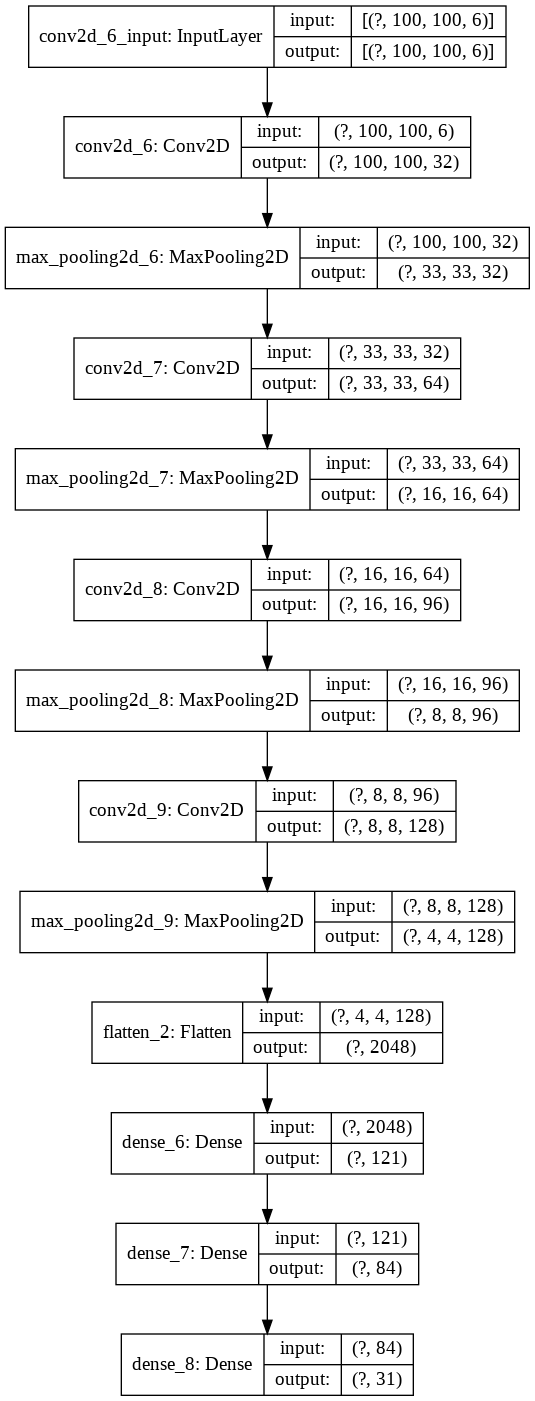

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


### 3


# ******Explanation of learning curves for training and  validation ******

Training accuracy=   99.75 %

Validation accuracy= 95.16%

Test Accuracy =      95.97 %

<font color=blue>For both Training,and validation set, model accuracy increases with the increased number of epochs. This is because models are doing the same thing again and again for more time which helps them to come up with the best answer.

From the graph we can conclude that :
1.Till 25 epoch the curve is very steep which shows the difference of accuracy is changing at a rapid positive rate. But after 25 epochs, the gradient becomes less steeper but it is still positive. Finally it started to become flat at around 200 epoch. And the same happened with error rate.

This model is an optimal model not giving any under and over fitting as the accuracy in validation,test and training are very close to each other.So this model can classify the difference offset of an image correctly in the most of the cases. </font>




### See if it worked

In [ ]:
y_train_k=y_train_k.astype(int)
print(y_train_k.astype(int))
print(y_train_k.shape)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
(2790, 31)


In [ ]:
y_validation_k=y_validation_k.astype(int)
print(y_validation_k.astype(int))
print(y_validation_k.shape)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
(310, 31)


In [ ]:
y_test_k=y_test_k.astype(int)
print(y_test_k.astype(int))
print(y_test_k.shape)



[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
(620, 31)


In [ ]:

nEpochs = 200

history = model.fit(Train_pair_image, y_train_k,epochs=nEpochs, verbose=1,
                    validation_data=(Validation_pair_image, y_validation_k))

Epoch 1/200
88/88 [==============================] - 1s 14ms/step - loss: 3.4379 - accuracy: 0.0272 - val_loss: 3.4335 - val_accuracy: 0.0258
Epoch 2/200
88/88 [==============================] - 1s 11ms/step - loss: 3.4340 - accuracy: 0.0323 - val_loss: 3.4318 - val_accuracy: 0.0323
Epoch 3/200
88/88 [==============================] - 1s 11ms/step - loss: 3.4263 - accuracy: 0.0351 - val_loss: 3.4047 - val_accuracy: 0.0387
Epoch 4/200
88/88 [==============================] - 1s 11ms/step - loss: 3.3172 - accuracy: 0.0584 - val_loss: 3.1249 - val_accuracy: 0.0581
Epoch 5/200
88/88 [==============================] - 1s 11ms/step - loss: 2.9848 - accuracy: 0.0961 - val_loss: 2.9036 - val_accuracy: 0.0839
Epoch 6/200
88/88 [==============================] - 1s 11ms/step - loss: 2.8153 - accuracy: 0.1082 - val_loss: 2.6872 - val_accuracy: 0.1290
Epoch 7/200
88/88 [==============================] - 1s 11ms/step - loss: 2.6772 - accuracy: 0.1448 - val_loss: 2.5752 - val_accuracy: 0.1806
Epoch 

In [ ]:
print("Training Accuracy:")
model.evaluate(Train_pair_image,y_train_k)

print("Validation Accuracy:")
model.evaluate(Validation_pair_image,y_validation_k)

print("Test Accuracy:")
model.evaluate(Test_pair_image,y_test_k)


Training Accuracy:
88/88 [==============================] - 1s 7ms/step - loss: 0.0203 - accuracy: 0.9975
Validation Accuracy:
10/10 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9516
Test Accuracy:
20/20 [==============================] - 0s 6ms/step - loss: 0.1820 - accuracy: 0.9597


[0.18197843432426453, 0.9596773982048035]

### Learning curves for training and validation

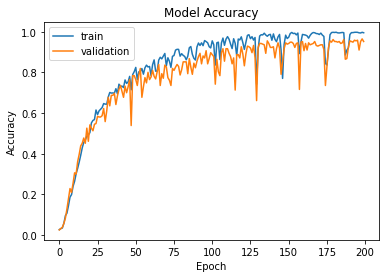

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'

if 'acc' in history.history :
    k = 'acc'

if k != '' :
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

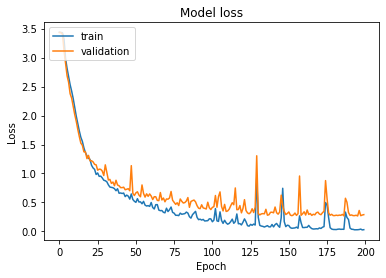

In [ ]:
history.history.keys()
'val_' + k
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 4 Regression Network

<font color=blue>We need to output  float values between -1 to 1 which corroseposnf to -45 to 45 degree;in my case -15 to 15 degree. So I have changed the degree range from -15 to 15 to -1 to 1. First,I again converted by degree from 0 to 30 to -15 to 15 by subtracting by 15 and then I divided it by 15 to get the range between -1 to 1.</font>

My loss here is mean_squared_error as it's a regression problem outputting the error value in the range of 0 to 1.
I didnt use any activation at my output/lastyer as we dont need it as the output will be already between -1 to 1

<font color=blue>The reason I didnt use dropout in my model is beacuase there is not a very big difference between the accuracy of the model in training and validation set. Though yes, accuracy is better in training set but this cant be considered as a standadr case of overfitting because model give good and neareer to the accuracy like training set.</font>

I have selected my learning rate to be 0.0001 instead of a big learning rate so that it does not miss out the global minima and though it will take a bit more time but this value is a good trade off between accuracy and complexity.


# ******Explanation of learning curves for training and  validation ******

Training MSE        =   0.00042012

Validation MSE    =   0.00072420

Test MSE           =   0.00072201

<font color=blue>For both Training,and validation set, model mse decreases with the increased number of epochs but the change was too minimal so it looks that its a flat curve.

From the graph we can conclude that :
Till 7 to 8 epoch the curve is very steep which shows the difference of MSE is changing at a rapid negative rate. But after that epoch, the gradient becomes less steeper but it is still negative but from the graph it may assume that it's flat and constant but it decreases very slowly with each epoch. Finally it started to become flat at around 80 to 100 epoch. And the same happened with loss rate.

This model is an optimal model not giving any under and over fitting as the accuracy in validation,test and training are very close to each other.So this model can classify the difference offset of an image correctly in most of the cases.
 </font>



In [ ]:
Reg_Train_degree=(Train_degree-15)/15
print(Reg_Train_degree)

[-1.         -0.93333333 -0.86666667 ...  0.86666667  0.93333333
  1.        ]


In [ ]:
Reg_Validation_degree=(Validation_degree-15)/15
print(Reg_Validation_degree)

[-1.         -0.93333333 -0.86666667 -0.8        -0.73333333 -0.66666667
 -0.6        -0.53333333 -0.46666667 -0.4        -0.33333333 -0.26666667
 -0.2        -0.13333333 -0.06666667  0.          0.06666667  0.13333333
  0.2         0.26666667  0.33333333  0.4         0.46666667  0.53333333
  0.6         0.66666667  0.73333333  0.8         0.86666667  0.93333333
  1.         -1.         -0.93333333 -0.86666667 -0.8        -0.73333333
 -0.66666667 -0.6        -0.53333333 -0.46666667 -0.4        -0.33333333
 -0.26666667 -0.2        -0.13333333 -0.06666667  0.          0.06666667
  0.13333333  0.2         0.26666667  0.33333333  0.4         0.46666667
  0.53333333  0.6         0.66666667  0.73333333  0.8         0.86666667
  0.93333333  1.         -1.         -0.93333333 -0.86666667 -0.8
 -0.73333333 -0.66666667 -0.6        -0.53333333 -0.46666667 -0.4
 -0.33333333 -0.26666667 -0.2        -0.13333333 -0.06666667  0.
  0.06666667  0.13333333  0.2         0.26666667  0.33333333  0.4
  0.466

In [ ]:
Reg_Test_degree=(Test_degree-15)/15
#print(Reg_Test_degree)

In [ ]:

y_train_k = Reg_Train_degree
y_validation_k=Reg_Validation_degree
y_test_k = Reg_Test_degree

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100,100,6)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(121, activation='relu'))
#model.add(Dropout(0.16))
model.add(Dense(84, activation='relu'))

model.add(Dense(1))

model.compile(Adam(lr=0.0001),loss='mean_squared_error',metrics=['mse'])



In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 32)      1760      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 96)        55392     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 96)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 13824)            

In [ ]:

nEpochs = 100

history = model.fit(Train_pair_image, y_train_k,epochs=nEpochs, verbose=1,
                    validation_data=(Validation_pair_image, y_validation_k))

Epoch 1/100
88/88 [==============================] - 1s 17ms/step - loss: 0.3569 - mse: 0.3569 - val_loss: 0.3401 - val_mse: 0.3401
Epoch 2/100
88/88 [==============================] - 1s 15ms/step - loss: 0.3146 - mse: 0.3146 - val_loss: 0.2468 - val_mse: 0.2468
Epoch 3/100
88/88 [==============================] - 1s 15ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 4/100
88/88 [==============================] - 1s 15ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/100
88/88 [==============================] - 1s 15ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 6/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 7/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/100
88/88 [==============================] - 1s 14ms/step - loss: 0.

In [ ]:
print("Training Accuracy:")
model.evaluate(Train_pair_image,y_train_k)

print("Validation Accuracy:")
model.evaluate(Validation_pair_image,y_validation_k)

print("Test Accuracy:")
model.evaluate(Test_pair_image,y_test_k)

Training Accuracy:
88/88 [==============================] - 1s 7ms/step - loss: 4.2012e-04 - mse: 4.2012e-04
Validation Accuracy:
10/10 [==============================] - 0s 6ms/step - loss: 7.2420e-04 - mse: 7.2420e-04
Test Accuracy:
20/20 [==============================] - 0s 7ms/step - loss: 7.2201e-04 - mse: 7.2201e-04


[0.0007220113184303045, 0.0007220113184303045]

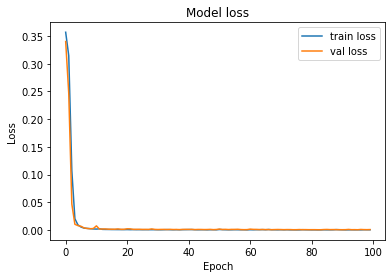

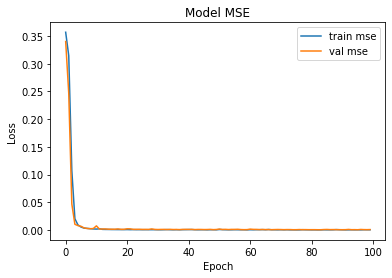

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.title('Model MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


import tensorflow as tf

from keras.models import load_model


# 5: Basic Transfer Learning

# **Explanation of my fine tuning**
I work with grayscale images for this problem. I have used mobilentv2 architecture as my pre-trained model with the last 5 unfrozen layers and additional 1 convolutional and 1 dense layer.</font>

I have selected my learning rate to be 0.0001 instead of a big learning rate so that it does not miss out the global minima and though it will take a bit more time but this value is a good trade off between accuracy and complexity.


# ******Explanation of learning curves for training and  validation ******

Training MSE        =   0.00052

Validation MSE      =   0.0031

Test MSE           =   0.0024

<font color=blue>For both Training and validation set, model mse decreased with the increased number of epochs but the change was too minimal so it looks that its a flat curve. </font>

From the graph we can conclude that :
Till 7 to 8 epoch the curve is very steep which shows the difference of error is changing at a rapid negative rate. But after that epoch, the gradient becomes less steeper but it is still negative but from the graph it may assume that it's flat and constant but it decreases very slowly with each epoch. Finally it started to become flat at around 170 to 200 epoch. And the same happened with loss rate.  </font>

<font color=blue> This model is a case of moderate overfitting as mse error in validation and test is slightly more than the training set which is also visible in the graph.So this model can classify the difference offset of an image correctly more correctly in the training set than the validation and test set. However it is very negligible to consider, so I didn't fine tune.</font>

I tried to add a Dropout layer but no improvement was seen. I even tried to unfreeze the last 5 layers but it didn't improve that much with a cost of high training time. Maybe decreasing the number of neurons may improve the model but my pc runs with very low gpu and it takes a huge time to again cross check with different hyperparameters.

AxesImage(54,36;334.8x217.44)
(480, 640)


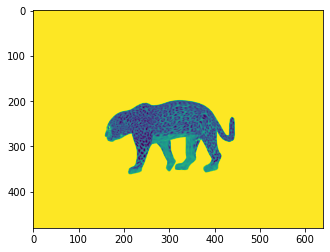

In [ ]:
gray_list=[]
for filename in list_files:
    gray_list.append(rgb2gray(io.imread(os.path.join(path,filename))))
print(plt.imshow(gray_list[0]))
print(gray_list[0].shape)

(480, 640)
(230, 390)
120
120
(480, 640) (230, 390)


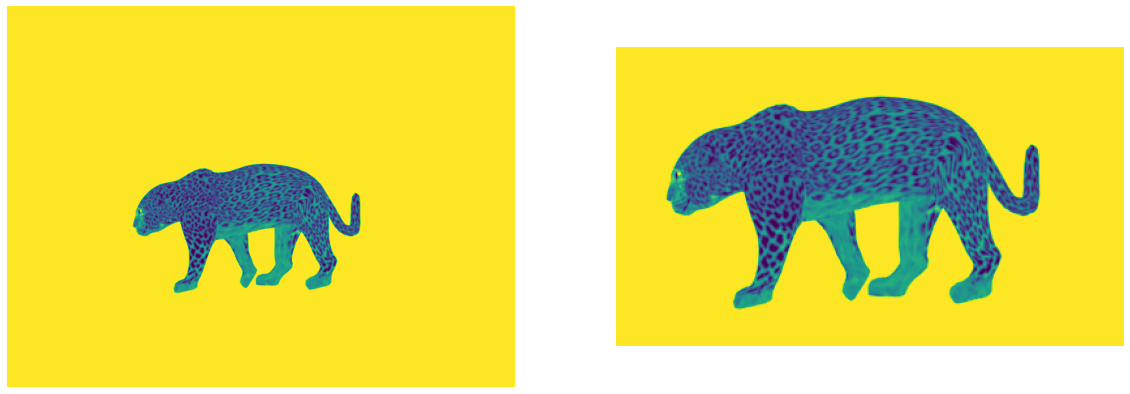

AxesImage(54,36;334.8x217.44)


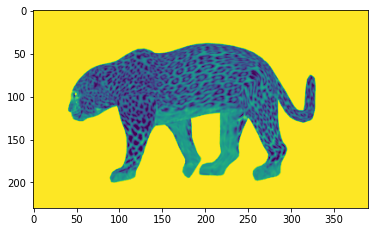

In [ ]:
crop_image=[]
for i in gray_list:
    B = crop(i, ((160, 90), (120, 130)))
    crop_image.append(B)



print(gray_list[0].shape)
print(crop_image[0].shape)
print(len(gray_list))
print(len(crop_image))


A = gray_list[0]

# crop_width{sequence, int}: Number of values to remove from the edges of each axis.
# ((before_1, after_1), … (before_N, after_N)) specifies unique crop widths at the
# start and end of each axis. ((before, after),) specifies a fixed start and end
# crop for every axis. (n,) or n for integer n is a shortcut for before = after = n
# for all axes.
B = crop_image[0]

print(A.shape, B.shape)
# (220, 220, 3) (70, 120, 3)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(A), plt.axis('off')
plt.subplot(122), plt.imshow(B), plt.axis('off')
plt.show()

print(plt.imshow(crop_image[1]))

In [ ]:
#crop_image[1]

120
(224, 224)
AxesImage(54,36;334.8x217.44)


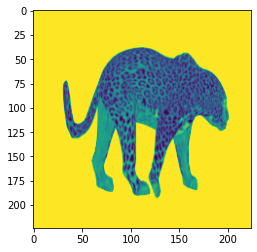

In [ ]:
resized_image_list=[]
for image in crop_image:
    image = resize(image, (224,224))
    resized_image_list.append(image)
print(len(resized_image_list))
print(resized_image_list[1].shape)
print(plt.imshow(resized_image_list[57]))

# We have created an numpy array containing 0s. This is the depth channed we will leave blank and will be the last channel our paired image </font>

In [ ]:
import numpy as np
lal=np.zeros((224,224,1))
print(lal.shape)

(224, 224, 1)


In [ ]:
image_file=np.array(resized_image_list)
image_name=[]
for i in range(0,len(list_files)):
    image_name.append(i)
print(image_name)
image_name=np.array(image_name)

x=np.random.permutation(len(image_file))

shuffled_image=image_file[x]
shuffled_imageName=image_name[x]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [ ]:
#image file:
Training_set=shuffled_image[0:90]
Validation_Set=shuffled_image[90:100]
Test_Set=shuffled_image[100:120]

#classes:
Training_class=shuffled_imageName[0:90]
Validation_class=shuffled_imageName[90:100]
Test_class=shuffled_imageName[100:120]

# We have pair rgb images and also reshape each imagre from 224,224 to 224,224,1. We then concatnate 2 images and the blank depth channel created earlier to make it 224,224,3 shape.

In [ ]:
Train_degree=[]
Train_pair_image=[]
for img in Training_class:
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            Train_pair_image.append(np.concatenate((image_file[angle1].reshape(224,224,1),image_file[angle2].reshape(224,224,1),lal),axis=2))
            Train_degree.append(i)

Train_pair_image=np.array(Train_pair_image)
Train_degree=np.array(Train_degree)
print( Train_pair_image.shape)
print(Train_degree.shape)
print(len(Train_degree))

(2790, 224, 224, 3)
(2790,)
2790


In [ ]:

#print(Train_degree.min())

In [ ]:
Train_degree=Train_degree.astype(float)
for i in range(0,len(Train_degree)):
  Train_degree[i]=Train_degree[i]/15


In [ ]:
#print(Train_degree.max())
#print(Train_degree.min())

In [ ]:
#Train_degree[2]

In [ ]:
Validation_degree=[]
Validation_pair_image=[]
for img in Validation_class:
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            Validation_pair_image.append(np.concatenate((image_file[angle1].reshape(224,224,1),image_file[angle2].reshape(224,224,1),lal),axis=2))
            Validation_degree.append(i)
Validation_degree=np.array(Validation_degree)
Validation_pair_image=np.array(Validation_pair_image)
print(Validation_pair_image.shape)
print(Validation_degree.shape)

(310, 224, 224, 3)
(310,)


In [ ]:
 Validation_pair_image[:,:,:,:3].shape

(310, 224, 224, 3)

In [ ]:
#print(Validation_degree)


In [ ]:
Validation_degree=Validation_degree.astype(float)
for i in range(0,len(Validation_degree)):
  Validation_degree[i]=Validation_degree[i]/15

In [ ]:
#print(Validation_degree)


In [ ]:
Test_degree=[]
Test_pair_image=[]
for img in Test_class:
    angle1=img
    for i in range(-15,16):
            angle2=(img+i)%120
            Test_pair_image.append(np.concatenate((image_file[angle1].reshape(224,224,1),image_file[angle2].reshape(224,224,1),lal),axis=2))
            Test_degree.append(i)
Test_pair_image=np.array(Test_pair_image)
Test_degree=np.array(Test_degree)
print(Test_pair_image.shape)
print(Test_degree.shape)

(620, 224, 224, 3)
(620,)


In [ ]:
#print(Test_degree)

In [ ]:
Test_degree=Test_degree.astype(float)
for i in range(0,len(Test_degree)):
  Test_degree[i]=Test_degree[i]/15

In [ ]:
#print(Test_degree)

In [ ]:

y_train_k = Train_degree
y_validation_k=Validation_degree
y_test_k = Test_degree


In [ ]:
#mobilenet created in such a way that it work with input image shape of 224,224,3. So I didnt change that.
#by setting include_top as false, we want our last layer to be removed from this architecture. That means last layer will not be freezed.
#weight will be the already assigned weeights it got from training on imagenet dataset.
base_model = MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")


In [ ]:
base_model.trainable=True
print(len(base_model.layers))

155


In [ ]:
for layer in base_model.layers[:150] :
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want

y=Conv2D(32,(3,3),activation='relu')(base_model.output)
y= Flatten()(y)
y=Dense(84, activation='relu')(y)
#y=Dropout(0.25)(y)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1,activation='tanh')(y)

In [ ]:
# create a model object
model = Model(inputs=base_model.input, outputs=prediction)


In [ ]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
model.compile(Adam(lr=0.0001),loss='mean_squared_error',metrics=['mse'])

In [ ]:

nEpochs = 200
history = model.fit(Train_pair_image, y_train_k,epochs=nEpochs, verbose=1,
                    validation_data=(Validation_pair_image, y_validation_k))

Epoch 1/200
88/88 [==============================] - 5s 60ms/step - loss: 0.3363 - mse: 0.3363 - val_loss: 0.2964 - val_mse: 0.2964
Epoch 2/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 3/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 4/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.1251 - val_mse: 0.1251
Epoch 5/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0937 - val_mse: 0.0937
Epoch 6/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0941 - val_mse: 0.0941
Epoch 7/200
88/88 [==============================] - 4s 48ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0833 - val_mse: 0.0833
Epoch 8/200
88/88 [==============================] - 4s 48ms/step - loss: 0.

In [ ]:
print("Training Accuracy:")
model.evaluate(Train_pair_image,y_train_k)

print("Validation Accuracy:")
model.evaluate(Validation_pair_image,y_validation_k)

print("Test Accuracy:")
model.evaluate(Test_pair_image,y_test_k)

Training Accuracy:
88/88 [==============================] - 4s 40ms/step - loss: 5.1769e-04 - mse: 5.1769e-04
Validation Accuracy:
10/10 [==============================] - 0s 36ms/step - loss: 0.0031 - mse: 0.0031
Test Accuracy:
20/20 [==============================] - 1s 46ms/step - loss: 0.0024 - mse: 0.0024


[0.0024149182718247175, 0.0024149182718247175]

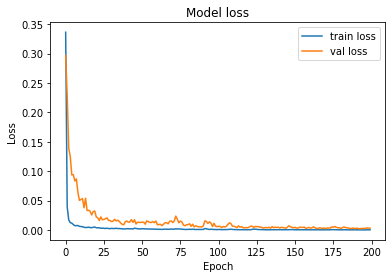

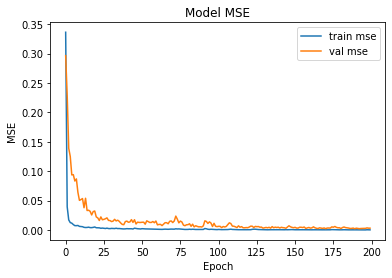

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# accuracies
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


import tensorflow as tf

from keras.models import load_model


# 5.1 Non-sequential Model and Fine Tuning

# **Explanation of my fine tuning**
<font color=blue>I work with Rgb images for this problem. So after pairing each image, I have passed 1st image in left input and 2nd image in right input from each pair for my Siamese network. And then by finding the mean square between these two images we find the difference between the score of images and in this way our model tried to predict its output in one shot classification method.</font>


# ******Explanation of learning curves for training and  validation ******

Training MSE        =   0.00056

Validation MSE      =   0.0067

Test MSE           =   0.0055

<font color=blue>For both Training and validation set, model mse decreased with the increased number of epochs but the change was too minimal so it looks that its a flat curve. </font>

From the graph we can conclude that :
Till 7 to 8 epoch the curve is very steep which shows the difference of error is changing at a rapid negative rate. But after that epoch, the gradient becomes less steeper but it is still negative . From the graph we can see that for the training set, it may assume that it's flat and constant but it decreases very slowly with each epoch. Finally it started to become flat at around 170 to 200 epoch. And the same happened with loss rate.  </font>

<font color=blue>How did I fine tune this model to achieve this current improved result  that was very bad before without fine tuning?
1. Unfreeze the last 5 layers for the model to introduce learning from our data set.
2.Added dropout to reduce the overfitting which was more before. I set the dropout to 0.01 as increasing this forced the model to stop learning .
3. Adding tanh activation helped to improve the result.
4. Increase learning rate to 0.00001 from 0.0001. </font>

This model is a case of overfitting as mse error in validation and test is more than the training set which is also visible in the graph.So this model can classify the difference offset of an image correctly more correctly in the training set than the validation and test set. However the error is not that much either for both validation and training, so I didn't fine tune further.




AxesImage(54,36;334.8x217.44)


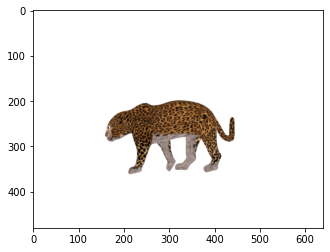

In [ ]:
path ="Synthetic_Leopard_Circle"
list_files = os.listdir(path)

list_files = natsorted(list_files)

image_list= []
for filename in list_files:
    image_list.append(io.imread(os.path.join(path,filename)))
print(plt.imshow(image_list[0]))

In [ ]:
crop_image=[]
for i in image_list:
   B = crop(i, ((160, 110), (120, 130), (0,0)), copy=False)
   crop_image.append(B)
   #B = crop(i, ((180, 110), (150, 140), (0,0)), copy=False)

(480, 640, 3)
(210, 390, 3)
120
120
(480, 640, 3) (210, 390, 3)


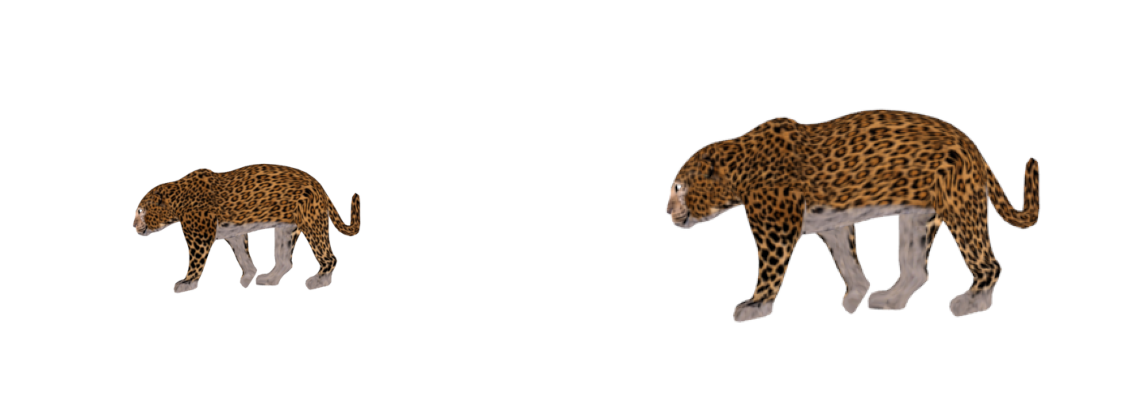

AxesImage(54,36;334.8x217.44)


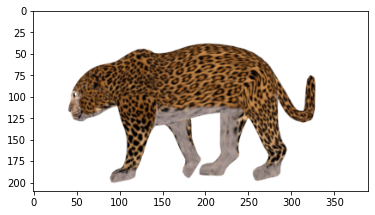

In [ ]:
print(image_list[0].shape)
print(crop_image[0].shape)
print(len(image_list))
print(len(crop_image))
A = image_list[0]
B = crop_image[0]
print(A.shape, B.shape)
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(A), plt.axis('off')
plt.subplot(122), plt.imshow(B), plt.axis('off')
plt.show()
print(plt.imshow(crop_image[1]))

In [ ]:
#print(crop_image[0])

120
(160, 100, 3)
AxesImage(54,36;334.8x217.44)


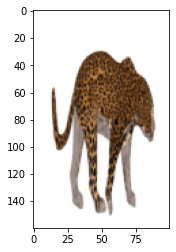

In [ ]:
resized_image_list=[]
for image in crop_image:
    image = resize(image, (160,100,3))
    resized_image_list.append(image)
print(len(resized_image_list))
print(resized_image_list[1].shape)
print(plt.imshow(resized_image_list[57]))

In [ ]:
image_file=np.array(resized_image_list)
print(image_file[0].max())
image_name=[]
for i in range(0,len(list_files)):
    image_name.append(i)
print(image_name)
image_name=np.array(image_name)
print(image_name.shape)
x=np.random.permutation(len(image_file))
print(x)
shuffled_image=image_file[x]
shuffled_imageName=image_name[x]

1.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
(120,)
[ 69  47  15  82  65  14  23   6  42  35  25  87  45  17  40  44  33  70
  36  60  16  74 108  61  55  64 110 105 109  49  10  20  53   1  96  58
  48  34  99  41  30 106  94  67   4  39  19  29  76  21  59  11 103  46
  12  50  68   0 112  88  37  97  86 101  31  22   8  43  32 114  66  73
 104 100  54  51  56 113 119  52  98   3  95  24 111  72   7  71  80  63
  90  18  57  85  77  83 115  79  62  92  13 118  78 107   5  84  81 117
  27  91  75  93 116   2  38  89  28 102   9  26]


In [ ]:
#image file:
Training_set=shuffled_image[0:90]
Validation_Set=shuffled_image[90:100]
Test_Set=shuffled_image[100:120]

#classes:
Training_class=shuffled_imageName[0:90]
Validation_class=shuffled_imageName[90:100]
Test_class=shuffled_imageName[100:120]

In [ ]:
Train_degree=[]
Train_pair_image=[]
for img in Training_class:
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            Train_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Train_degree.append(i)

Train_pair_image=np.array(Train_pair_image)
Train_degree=np.array(Train_degree)
print( Train_pair_image.shape)
print(Train_degree.shape)


(2790, 160, 100, 6)
(2790,)


In [ ]:
Validation_degree=[]
Validation_pair_image=[]
for img in Validation_class:
    #print(img)
    angle1=img
    for i in range(-15,16):
            angle2=(i+img)%120
            #print(angle1,angle2)
            Validation_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Validation_degree.append(i)
Validation_degree=np.array(Validation_degree)
Validation_pair_image=np.array(Validation_pair_image)
print(Validation_pair_image.shape)
print(Validation_degree.shape)




(310, 160, 100, 6)
(310,)


In [ ]:
Test_degree=[]
Test_pair_image=[]
for img in Test_class:
    angle1=img
    for i in range(-15,16):
            angle2=(img+i)%120
            Test_pair_image.append(np.concatenate((image_file[angle1],image_file[angle2]),axis=2))
            Test_degree.append(i)
Test_pair_image=np.array(Test_pair_image)
Test_degree=np.array(Test_degree)
print(Test_pair_image.shape)
print(Test_degree.shape)

(620, 160, 100, 6)
(620,)


In [ ]:
print(Train_degree.min())

Train_degree=Train_degree.astype(float)
for i in range(0,len(Train_degree)):
  Train_degree[i]=Train_degree[i]/15

print(Train_degree.max())
print(Train_degree.min())

print(Validation_degree)

Validation_degree=Validation_degree.astype(float)
for i in range(0,len(Validation_degree)):
  Validation_degree[i]=Validation_degree[i]/15
print(Validation_degree)


print(Test_degree)

Test_degree=Test_degree.astype(float)
for i in range(0,len(Test_degree)):
  Test_degree[i]=Test_degree[i]/15

print(Test_degree)

-15
1.0
-1.0
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 -15 -14
 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4
   5   6   7   8   9  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  

In [ ]:

y_train_k =Train_degree
y_validation_k=Validation_degree
y_test_k = Test_degree

In [ ]:
base_model= MobileNetV2(input_shape = (160,100, 3), include_top = False, weights = "imagenet")





In [ ]:
base_model.trainable=True
print(len(base_model.layers))


155


In [ ]:
for layer in base_model.layers[0:150] :
  layer.trainable = False

In [ ]:


#Building a sequential model
input_shape=(160, 100, 3)
left_input = Input(input_shape)
right_input = Input(input_shape)

features_1= base_model(left_input)
features_2= base_model(right_input)

y = keras.layers.Concatenate()([features_1,features_2])
y=Conv2D(32,(3,3),activation='relu')(y)
y=BatchNormalization()(y)
y =Flatten()(y)
y=Dense(121, activation='relu')(y)
y=Dropout(0.16)(y)
prediction = Dense(1,activation='tanh')(y)
siamese_net =Model(inputs=[left_input, right_input], outputs=prediction)


siamese_net.compile(Adam(lr=0.00001),loss='mean_squared_error',metrics=['mse'])

#plot_model(siamese_net, show_shapes=True, show_layer_names=True)

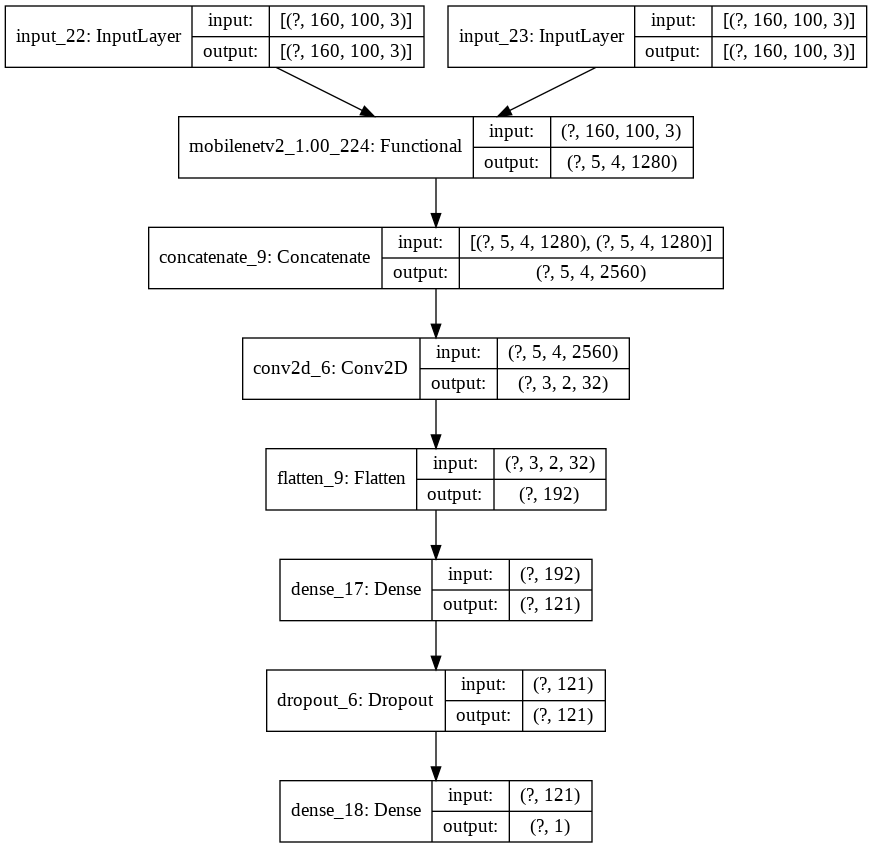

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(siamese_net, show_shapes=True, show_layer_names=True)


## Taking the 1st image from each pair and making a new array. That array  image  will feed in my left_input. Taking the 2nd image of each pair and making a new array. These array images will be fed in my right_input. So I will have 6 new image arrays; two for training ,2 for validation and 2 for testing.


In [ ]:
a=Train_pair_image[:,:,:,:3]
b= Train_pair_image[:,:,:,3:]
c= Validation_pair_image[:,:,:,:3]
d=Validation_pair_image[:,:,:,3:]
e= Test_pair_image[:,:,:,:3]
f=Test_pair_image[:,:,:,3:]

In [ ]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(e.shape)
print(f.shape)

(2790, 160, 100, 3)
(2790, 160, 100, 3)
(310, 160, 100, 3)
(310, 160, 100, 3)
(620, 160, 100, 3)
(620, 160, 100, 3)


In [ ]:
nEpochs = 200
history =siamese_net.fit(x=[a,b],y=y_train_k,epochs=nEpochs, verbose=1,
                    validation_data=([c,d], y_validation_k))

Epoch 1/200
88/88 [==============================] - 4s 51ms/step - loss: 0.1974 - mse: 0.1974 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 2/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0860 - val_mse: 0.0860
Epoch 3/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 4/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 5/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 6/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 7/200
88/88 [==============================] - 3s 37ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 8/200
88/88 [==============================] - 3s 38ms/step - loss: 0.

In [ ]:
print('TRAINING ACCURACY')
siamese_net.evaluate(x=[a,b],y=y_train_k)

print("VALIDATION ACCURACY")
siamese_net.evaluate(x=[c,d],y=y_validation_k)

print("TEST ACCURACY")
siamese_net.evaluate(x=[e,f],y=y_test_k)

TRAINING ACCURACY
88/88 [==============================] - 3s 31ms/step - loss: 5.6268e-04 - mse: 5.6268e-04
VALIDATION ACCURACY
10/10 [==============================] - 0s 27ms/step - loss: 0.0067 - mse: 0.0067
TEST ACCURACY
20/20 [==============================] - 1s 30ms/step - loss: 0.0055 - mse: 0.0055


[0.0054977815598249435, 0.0054977815598249435]

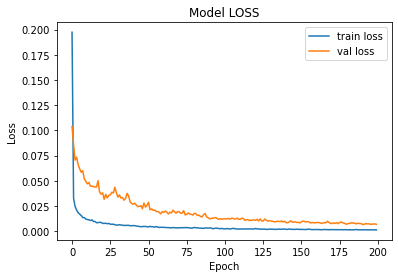

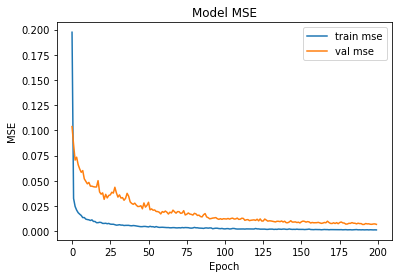

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


import tensorflow as tf

from keras.models import load_model
